### Попередня обробка даних в Pandas

**Мета роботи:** Ознайомитись з операціями попередньої обробки даних
Pandas.  

**Завдання до лабораторної роботи**  

Створити програму, яка виконує наступні завдання, використовуючи файл
відповідно до варіанту:
1. Читає файл та змінює назви стовпців.
2. Виконує попередню обробку даних.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_json('Version 3.json', orient='split')
df

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.88,32825.00,128333.212416,34218.54,43072.0
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.51616,31915.40,128459.450880,34252.20,231827.0
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.81184,29842.10,125131.570944,33364.86,92621.0
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911.0
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972.0
...,...,...,...,...,...,...,...,...,...,...
1007,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.0864,8341.00,31503.360000,8400.00,48227.0
1008,2018-05-10,34916.224,9310.00,35235.458048,9395.12,33641.088,8970.00,33761.850880,9002.20,25055.0
1009,2018-05-09,34421.1712,9178.00,35216.256000,9390.00,33622.336,8965.00,34916.224000,9310.00,25673.0
1010,2018-05-08,35122.496,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533.0


Volume is the number of shares of a security traded during a given period of time

In [3]:
df = df.rename({'Unnamed: 0': 'date'}, axis=1)

In [4]:
df.dtypes

date          object
open_SAR      object
open_USD     float64
high_SAR     float64
high_USD     float64
low_SAR       object
low_USD      float64
close_SAR    float64
close_USD    float64
volume       float64
dtype: object

In [5]:
df['open_SAR'] = pd.to_numeric(df['open_SAR'], errors='coerce')
df['low_SAR'] = pd.to_numeric(df['low_SAR'], errors='coerce')

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
df = df.sort_values(by=['date'], ascending=[True])

In [8]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1008.000000,1008.000000,1008.000000,1006.000000
mean,35388.425494,9442.112103,36375.879594,9700.834181,34317.089904,9234.656263,35460.962359,9598.722897,53280.344930
std,22588.536296,6022.063308,23782.811191,6329.423415,21368.764983,6068.102075,22874.071846,6998.045009,35661.808385
min,12045.197184,3211.710000,-5.000000,3276.500000,11837.237504,3156.260000,6723.350000,3211.720000,-45576.000000
25%,24268.463360,6474.720000,24695.427648,6584.995000,23744.569984,6341.060000,24252.946080,6474.720000,30062.250000
50%,30846.046144,8224.735000,31509.323136,8403.000000,30190.720000,8057.945000,30841.995712,8229.265000,43819.500000
75%,38635.167520,10302.770000,39251.011328,10466.500000,37541.110208,10032.500000,38637.699040,10311.700000,64980.500000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,73867.390848,152201.770624,115463.000000,402201.000000


In [9]:
df['volume'] = df['volume'].where(df['volume'] >= 0, np.nan)
df['high_SAR'] = df['high_SAR'].where(df['high_SAR'] >= 0, np.nan)

In [10]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1006.000000,1008.000000,1007.000000,1007.000000,1007.000000,1008.000000,1008.000000,1008.000000,1005.000000
mean,35388.425494,9442.112103,36412.007577,9700.834181,34317.089904,9234.656263,35460.962359,9598.722897,53378.709453
std,22588.536296,6022.063308,23766.938715,6329.423415,21368.764983,6068.102075,22874.071846,6998.045009,35542.762238
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,6723.350000,3211.720000,5743.000000
25%,24268.463360,6474.720000,24696.365248,6584.995000,23744.569984,6341.060000,24252.946080,6474.720000,30084.000000
50%,30846.046144,8224.735000,31514.611200,8403.000000,30190.720000,8057.945000,30841.995712,8229.265000,43830.000000
75%,38635.167520,10302.770000,39253.561600,10466.500000,37541.110208,10032.500000,38637.699040,10311.700000,64991.000000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,73867.390848,152201.770624,115463.000000,402201.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 1011 to 0
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1012 non-null   datetime64[ns]
 1   open_SAR   1006 non-null   float64       
 2   open_USD   1008 non-null   float64       
 3   high_SAR   1007 non-null   float64       
 4   high_USD   1007 non-null   float64       
 5   low_SAR    1007 non-null   float64       
 6   low_USD    1008 non-null   float64       
 7   close_SAR  1008 non-null   float64       
 8   close_USD  1008 non-null   float64       
 9   volume     1005 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 87.0 KB


In [12]:
df[df.duplicated()].shape[0]

11

In [13]:
df = df.drop_duplicates()

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 1011 to 0
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       991 non-null    datetime64[ns]
 1   open_SAR   991 non-null    float64       
 2   open_USD   991 non-null    float64       
 3   high_SAR   991 non-null    float64       
 4   high_USD   991 non-null    float64       
 5   low_SAR    991 non-null    float64       
 6   low_USD    991 non-null    float64       
 7   close_SAR  991 non-null    float64       
 8   close_USD  991 non-null    float64       
 9   volume     991 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 85.2 KB


In [16]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,34812.936243,9282.459536,35774.646320,9538.888204,33783.918181,9008.083986,34902.053846,9306.221695,52916.086781
std,21770.276418,5804.787868,22825.918870,6086.262497,20599.932542,5492.729453,21962.001971,5855.909229,35342.650759
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24235.516096,6462.115000,24660.698944,6575.485000,23706.765952,6321.130000,24210.200896,6455.365000,29989.000000
50%,30743.078912,8197.280000,31405.512064,8373.910000,30015.051264,8003.160000,30742.103808,8197.020000,43671.000000
75%,38320.349568,10217.670000,39078.061632,10419.705000,37162.657344,9908.985000,38333.363456,10221.140000,64621.000000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


<AxesSubplot:>

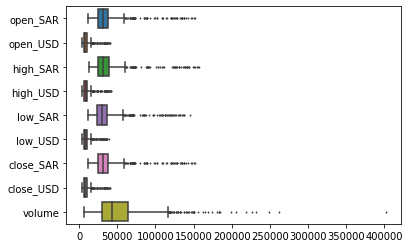

In [17]:
sns.boxplot(data=df, orient="h", fliersize=1)

In [18]:
def replace_outliers(df, field_names):
    for i in range(len(field_names)):
        field_name = field_names[i]
        distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
        high = df[df[field_name] > distance + np.percentile(df[field_name], 75)][field_name].to_numpy()
        df[field_name] = df[field_name].replace(high, np.nan)
        df[field_name] = df[field_name].fillna(method='ffill')
        df[field_name] = df[field_name].fillna(method='bfill')

        distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
        low = df[df[field_name] > -distance + np.percentile(df[field_name], 25)][field_name].to_numpy()
        df[field_name] = df[field_name].replace(high, np.nan)
        df[field_name] = df[field_name].fillna(method='ffill')
        df[field_name] = df[field_name].fillna(method='bfill')
    return df


In [19]:
df = df.set_index('date')

In [20]:
df_old = df.copy()
df = replace_outliers(df, list(df))

In [21]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,31847.317813,8491.712301,32634.838612,8701.695449,31031.514683,8274.188002,31871.954648,8498.281423,48671.782038
std,12034.553478,3208.871981,12404.793098,3307.592016,11716.817670,3124.151469,12063.467061,3216.581448,23842.409576
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24235.516096,6462.115000,24660.698944,6575.485000,23706.765952,6321.130000,24210.200896,6455.365000,29989.000000
50%,30743.078912,8197.280000,31405.512064,8373.910000,30015.051264,8003.160000,30742.103808,8197.020000,43648.000000
75%,38320.349568,10217.670000,39078.061632,10419.705000,37162.657344,9908.985000,38333.363456,10221.140000,63300.000000
max,58822.211200,15684.250000,60681.472000,16180.000000,57278.659072,15272.680000,58822.173696,15684.240000,116049.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991 entries, 2018-05-07 to 2021-01-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   991 non-null    float64
 1   open_USD   991 non-null    float64
 2   high_SAR   991 non-null    float64
 3   high_USD   991 non-null    float64
 4   low_SAR    991 non-null    float64
 5   low_USD    991 non-null    float64
 6   close_SAR  991 non-null    float64
 7   close_USD  991 non-null    float64
 8   volume     991 non-null    float64
dtypes: float64(9)
memory usage: 77.4 KB


<AxesSubplot:>

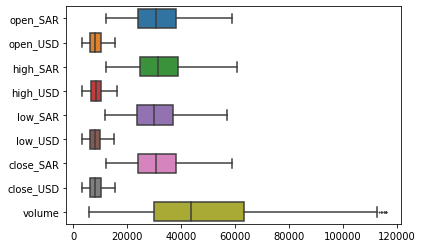

In [23]:
sns.boxplot(data=df, orient="h", fliersize=1)

In [24]:
df

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787.0
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533.0
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673.0
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055.0
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227.0
...,...,...,...,...,...,...,...,...,...
2021-01-26,58822.211200,15684.25,60681.472000,16180.00,57278.659072,15272.68,58822.173696,15684.24,84972.0
2021-01-27,58822.211200,15684.25,60681.472000,16180.00,57278.659072,15272.68,58822.173696,15684.24,95911.0
2021-01-28,58822.211200,15684.25,60681.472000,16180.00,57278.659072,15272.68,58822.173696,15684.24,92621.0


<AxesSubplot:xlabel='date'>

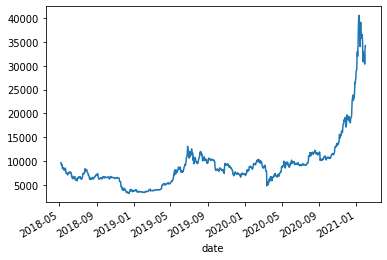

In [25]:
df_old.open_USD.plot()

<AxesSubplot:xlabel='date'>

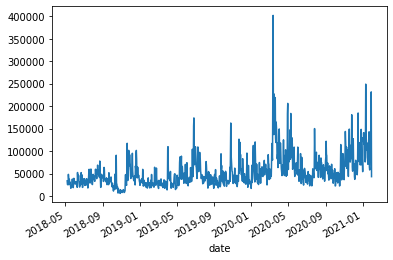

In [26]:
df_old.volume.plot()